In [1]:
import xarray as xr


def waterlevel2pressure(waterlevel, g=9.813, water_density=1023) -> xr.DataArray:
    return -1 * waterlevel * g * water_density

In [4]:
nc = xr.open_dataset(
    "/scratch-shared/mverlaan/gtsm_openDA_david/stochModel/input_dflowfm/climate_forcing/CMEMS_seas_AVanal19990101_20170101_pred20131215_20150102.nc",
    engine="netcdf4",
)


In [ ]:
sampled_nc = nc.sel(time=slice("2014-05-25", "2014-06-15"))
sampled_nc.to_netcdf("./steric_tide.nc")

In [5]:
xr.load_dataset("./steric_tide.nc")

<xarray.Dataset>
Dimensions:      (lat: 2041, lon: 4343, time: 22)
Coordinates:
  * time         (time) datetime64[ns] 2014-05-25 2014-05-26 ... 2014-06-15
Dimensions without coordinates: lat, lon
Data variables:
    latitude     (lat) float32 -80.0 -79.92 -79.83 -79.75 ... 89.83 89.92 90.0
    longitude    (lon) float32 -180.0 -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
    steric_tide  (time, lat, lon) float32 -17.87 -19.22 -19.22 ... 111.6 111.6

In [2]:
nc = xr.load_dataset("./steric_tide.nc")

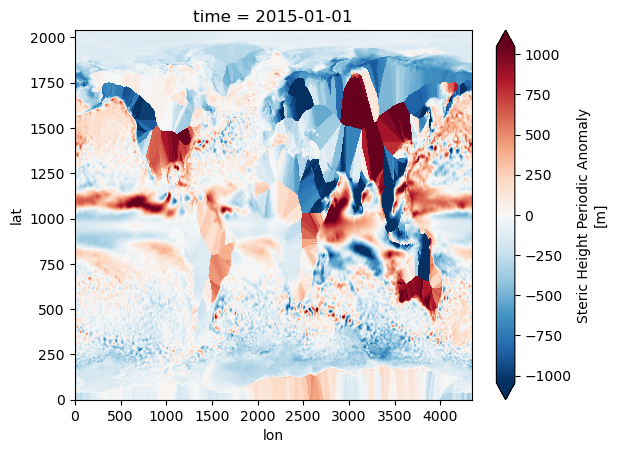

In [5]:
nc.steric_tide.isel(time=-1).plot(robust=True)

In [14]:
pressure_nc = nc.copy()
pressure_nc["p"] = waterlevel2pressure(nc.steric_tide)
pressure_nc.drop_vars("steric_tide")
pressure_nc

<xarray.Dataset>
Dimensions:      (lat: 2041, lon: 4343, time: 22)
Coordinates:
  * time         (time) datetime64[ns] 2014-05-25 2014-05-26 ... 2014-06-15
Dimensions without coordinates: lat, lon
Data variables:
    latitude     (lat) float32 -80.0 -79.92 -79.83 -79.75 ... 89.83 89.92 90.0
    longitude    (lon) float32 -180.0 -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
    steric_tide  (time, lat, lon) float32 -17.87 -19.22 -19.22 ... 111.6 111.6
    msl          (time, lat, lon) float32 1.794e+05 1.93e+05 ... -1.121e+06
    p            (time, lat, lon) float32 1.794e+05 1.93e+05 ... -1.121e+06

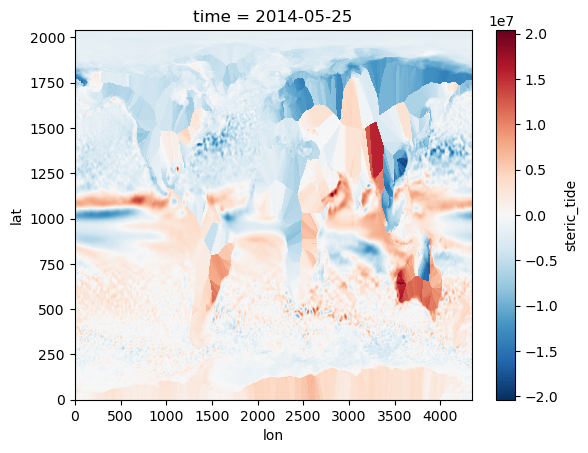

In [9]:
pressure_nc.isel(time=0).steric_tide.plot()

In [10]:
pressure_nc.to_netcdf("./steric_pressure.nc")